# Laboratorio 1
#### Universidad del Valle de Guatemala
#### CC3094 - Security Data Science
#### Julio Herrera 19402
#### Diego Arredondo 19422

In [32]:
import pandas as pd
from urllib.parse import urlparse # for parsing URLs
from pandas_profiling import ProfileReport # for generating reports
from sklearn.model_selection import train_test_split # for splitting data
from sklearn import tree, metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Cargando el dataset y mostrando 5 observaciones

In [33]:
data = pd.read_csv('dataset_pishing.csv')
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


# Parte 1 - Ingenieria de caracteristicas

## Exploracion de datos

Cantidad de observaciones "legitimate"

In [34]:
data[data['status'] == 'legitimate'].shape

(5715, 67)

Cantidad de observaciones "phishing"

In [35]:
data[data['status'] == 'phishing'].shape

(5715, 67)

Existe la misma cantidad de observaciones con status 'legitimate' y 'phishing' (5715) por lo que el dataset se encuentra balanceado.

## Derivacion de caracteristicas

Derivando las caracteristicas f1, f2, f4 – f20, f25, f26 y f27 en base al paper “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”

In [36]:
def f1_url_length(url):
    return len(url)

def f2_hostname_length(url):
    return len(urlparse(url).netloc)

def f4_number_of_dots(url):
    return url.count('.')

def f5_number_of_hyphens(url):
    return url.count('-')

def f6_number_of_at(url):
    return url.count('@')

def f7_number_of_question_mark(url):
    return url.count('?')

def f8_number_of_ampersand(url):
    return url.count('&')

def f9_number_of_bar(url):
    return url.count('|')

def f10_number_of_equal(url):
    return url.count('=')

def f11_number_of_underline(url):
    return url.count('_')

def f12_number_of_tilde(url):
    return url.count('~')

def f13_number_of_percent(url):
    return url.count('%')

def f14_number_of_slash(url):
    return url.count('/')

def f15_number_of_ast(url):
    return url.count('*')

def f16_number_of_colon(url):
    return url.count(':')

def f17_number_of_comma(url):
    return url.count(',')

def f18_number_of_semicolon(url):
    return url.count(';')

def f19_number_of_dollar(url):
    return url.count('$')

def f20_number_of_space(url):
    return url.count(' ') or url.count('%20')

def f25_has_https(url):
    return 1 if url.startswith('https') else 0

def f26_ratio_of_digits_url(url):
    digits = sum(c.isdigit() for c in url)
    return digits / len(url)

def f27_ratio_of_digits_hostname(url):
    hostname = urlparse(url).netloc
    digits = sum(c.isdigit() for c in hostname)
    return digits / len(hostname)

data['f1_url_length'] = data['url'].apply(f1_url_length)
data['f2_hostname_length'] = data['url'].apply(f2_hostname_length)
data['f4_number_of_dots'] = data['url'].apply(f4_number_of_dots)
data['f5_number_of_hyphens'] = data['url'].apply(f5_number_of_hyphens)
data['f6_number_of_at'] = data['url'].apply(f6_number_of_at)
data['f7_number_of_question_mark'] = data['url'].apply(f7_number_of_question_mark)
data['f8_number_of_ampersand'] = data['url'].apply(f8_number_of_ampersand)
data['f9_number_of_bar'] = data['url'].apply(f9_number_of_bar)
data['f10_number_of_equal'] = data['url'].apply(f10_number_of_equal)
data['f11_number_of_underline'] = data['url'].apply(f11_number_of_underline)
data['f12_number_of_tilde'] = data['url'].apply(f12_number_of_tilde)
data['f13_number_of_percent'] = data['url'].apply(f13_number_of_percent)
data['f14_number_of_slash'] = data['url'].apply(f14_number_of_slash)
data['f15_number_of_ast'] = data['url'].apply(f15_number_of_ast)
data['f16_number_of_colon'] = data['url'].apply(f16_number_of_colon)
data['f17_number_of_comma'] = data['url'].apply(f17_number_of_comma)
data['f18_number_of_semicolon'] = data['url'].apply(f18_number_of_semicolon)
data['f19_number_of_dollar'] = data['url'].apply(f19_number_of_dollar)
data['f20_number_of_space'] = data['url'].apply(f20_number_of_space)
data['f25_has_https'] = data['url'].apply(f25_has_https)
data['f26_ratio_of_digits_url'] = data['url'].apply(f26_ratio_of_digits_url)
data['f27_ratio_of_digits_hostname'] = data['url'].apply(f27_ratio_of_digits_hostname)

Mostrando el resultado de las nuevas columnas de derivacion de caracteristicas

In [37]:
# show only new features
data[['url', 'f1_url_length', 'f2_hostname_length', 'f4_number_of_dots', 'f5_number_of_hyphens', 'f6_number_of_at', 'f7_number_of_question_mark', 'f8_number_of_ampersand', 'f9_number_of_bar', 'f10_number_of_equal', 'f11_number_of_underline', 'f12_number_of_tilde', 'f13_number_of_percent', 'f14_number_of_slash', 'f15_number_of_ast', 'f16_number_of_colon', 'f17_number_of_comma', 'f18_number_of_semicolon', 'f19_number_of_dollar', 'f20_number_of_space', 'f25_has_https', 'f26_ratio_of_digits_url', 'f27_ratio_of_digits_hostname']].head()

,url,f1_url_length,f2_hostname_length,f4_number_of_dots,f5_number_of_hyphens,f6_number_of_at,f7_number_of_question_mark,f8_number_of_ampersand,f9_number_of_bar,f10_number_of_equal,...,f14_number_of_slash,f15_number_of_ast,f16_number_of_colon,f17_number_of_comma,f18_number_of_semicolon,f19_number_of_dollar,f20_number_of_space,f25_has_https,f26_ratio_of_digits_url,f27_ratio_of_digits_hostname
0,http://www.crestonwood.com/router.php,37,19,3,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0.000000,0.0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.220779,0.0
2,https://support-appleld.com.secureupdate.duila...,126,50,4,1,0,1,2,0,3,...,5,0,1,0,0,0,0,1,0.150794,0.0
3,http://rgipt.ac.in,18,11,2,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0.000000,0.0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,2,2,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.000000,0.0


## Preprocesamiento de datos

Convertir la columna categorica status a una variable binaria

In [38]:
data['status'] = data['status'].apply(lambda x: 0 if x == 'phishing' else 1)
data['status']

0        1
1        0
2        0
3        1
4        1
        ..
11425    1
11426    0
11427    1
11428    1
11429    0
Name: status, Length: 11430, dtype: int64

No se había creado una columna de dominio así que no es necesario quitarla

## Visualizacion de resultados

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
c:\Users\julio\AppData\Local\Programs\Python\Python38\lib\site-packages\multimethod\__init__.py:312: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)
c:\Users\julio\AppDat

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

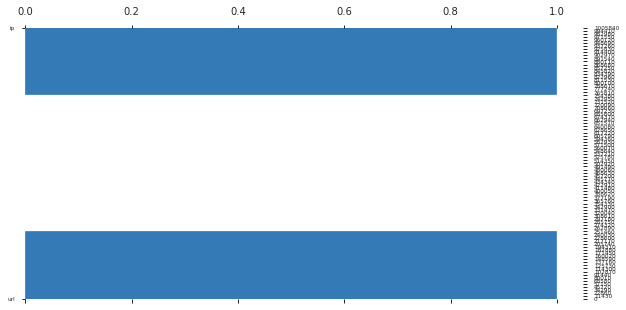

In [39]:
# Profile Report
profile = ProfileReport(data, title='Phishing Websites', explorative=True)
profile.to_file("phishing_websites.html")

Las columnas que son constantes, o que no tienen una varianza alta con la columna status son:
 - ip
 - nb_www
 - nb_com
 - nb_dslash
 - http_in_path
 - punycode
 - port
 - tld_in_path
 - tld_in_subdomain
 - abnormal_subdomain
 - nb_subdomain
 - prefix_suffix
 - random_domain
 - shortening_service
 - path_extension
 - nb_redirection
 - nb_external_redirection
 - length_words_raw
 - char_repeat
 - shortest_words_raw
 - shortest_word_host
 - shortest_word_path
 - longest_words_raw
 - longest_word_host
 - longest_word_path
 - avg_words_raw
 - avg_word_host
 - avg_word_path
 - phish_hints
 - domain_in_brand
 - brand_in_subdomain
 - brand_in_path
 - suspecious_tld
 - statistical_report
 - ratio_intHyperlinks
 - ratio_extHyperlinks
 - ratio_nullHyperlinks
 - nb_extCSS
 - ratio_intRedirection
 - ratio_extRedirection
 - ratio_intErrors
 - ratio_extErrors
 - login_form
 - external_favicon
 - links_in_tags
 - submit_email
 - ratio_intMedia
 - ratio_extMedia
 - sfh
 - iframe
 - popup_window
 - onmouseover
 - right_clic
 - empty_title
 - domain_with_copyright
 - whois_registered_domain
 - domain_registration_length
 - domain_age
 - web_traffic
 - dns_record
 - f1_url_length
 - f2_hostname_length
 - f4_number_of_dots
 - f5_number_of_hyphens
 - f6_number_of_at
 - f7_number_of_question_mark
 - f8_number_of_ampersand
 - f9_number_of_bar
 - f10_number_of_equal
 - f11_number_of_underline
 - f12_number_of_tilde
 - f13_number_of_percent
 - f14_number_of_slash
 - f15_number_of_ast
 - f16_number_of_colon
 - f17_number_of_comma
 - f18_number_of_semicolon
 - f19_number_of_dollar
 - f20_number_of_space
 - f25_has_https
 - f26_ratio_of_digits_url
 - f27_ratio_of_digits_hostname

Las columnas que tienen correlacion con 'status' son:
 - safe_anchor
 - domain_in_title
 - google_index
 - page_rank

## Seleccion de caracteristicas

In [40]:
# keep the features
data = data[['safe_anchor', 'domain_in_title', 'google_index', 'page_rank', 'status']]
data.head()

,safe_anchor,domain_in_title,google_index,page_rank,status
0,0.0,0,1,4,1
1,100.0,1,1,2,0
2,100.0,1,1,0,0
3,62.5,1,0,3,1
4,0.0,0,0,6,1


# Parte 2 - Implementacion

## Separacion de datos
 - Datos de entrenamiento: 55%
 - Datos de validacion: 15%
 - Datos de prueba: 30%
 - Almacene cada dataset en un archivo csv

In [41]:
# train 55%, validation 15%, test 30%
train, test = train_test_split(data, test_size=0.3, random_state=42)
train, val = train_test_split(train, test_size=0.15, random_state=42)
# save each dataset as csv
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)
test.to_csv('test.csv', index=False)

In [42]:
target_train = train['status']
feature_matrix_train = train.drop('status', axis=1)
target_test = test['status']
feature_matrix_test = test.drop('status', axis=1)
target_val = val['status']
feature_matrix_val = val.drop('status', axis=1)

## Implementacion

### Modelo 1: Decision Tree Classifier

Entrenamiento

In [43]:
clf = tree.DecisionTreeClassifier()  # clf means classifier
clf = clf.fit(feature_matrix_train, target_train)

# Make the prediction
target_pred = clf.predict(feature_matrix_val)
target_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

#### Modelo 1: Datos de validacion

Matriz de confusion

Accuracy Score 0.9000832639467111
Confusion Matrix
 [[537  52]
 [ 68 544]]


<AxesSubplot:>

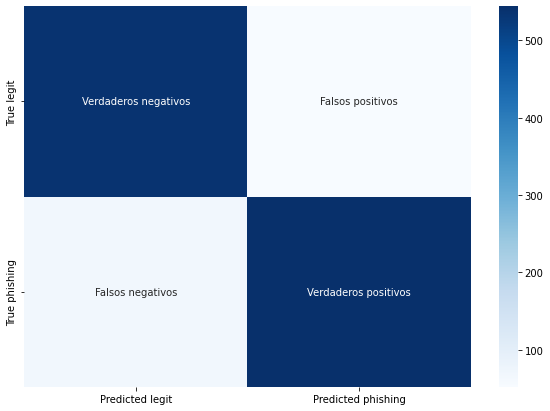

In [44]:
labels = ["Verdaderos negativos","Falsos positivos","Falsos negativos","Verdaderos positivos"]
labels = np.asarray(labels).reshape(2,2)
c_matrix = metrics.confusion_matrix(target_val, target_pred)
df_cm = pd.DataFrame(c_matrix, index = ['True legit','True phishing'],
                    columns = ['Predicted legit','Predicted phishing'])
print('Accuracy Score', metrics.accuracy_score(target_val, target_pred))
print('Confusion Matrix\n', metrics.confusion_matrix(target_val, target_pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=labels, fmt="", cmap='Blues')

 - Precision
 - Recall
 - F1-Score

In [45]:
print(metrics.classification_report(target_val, target_pred, target_names=['legit', 'phishing']))

              precision    recall  f1-score   support

       legit       0.89      0.91      0.90       589
    phishing       0.91      0.89      0.90       612

    accuracy                           0.90      1201
   macro avg       0.90      0.90      0.90      1201
weighted avg       0.90      0.90      0.90      1201



#### Modelo 1: Datos de prueba

In [46]:
# Make the prediction
target_pred = clf.predict(feature_matrix_test)
target_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

Matriz de confusion

Accuracy Score 0.9087197433654126
Confusion Matrix
 [[1554  143]
 [ 170 1562]]


<AxesSubplot:>

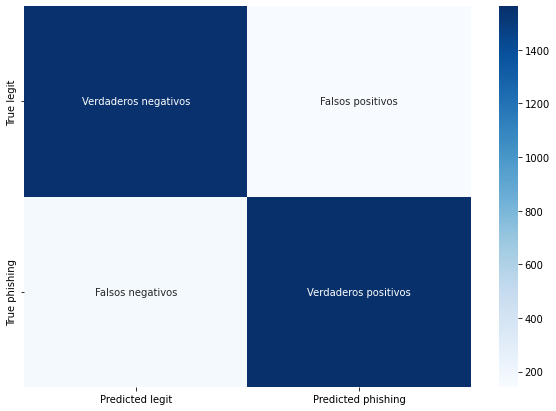

In [47]:
labels = ["Verdaderos negativos","Falsos positivos","Falsos negativos","Verdaderos positivos"]
labels = np.asarray(labels).reshape(2,2)
c_matrix = metrics.confusion_matrix(target_test, target_pred)
df_cm = pd.DataFrame(c_matrix, index = ['True legit','True phishing'],
                    columns = ['Predicted legit','Predicted phishing'])
print('Accuracy Score', metrics.accuracy_score(target_test, target_pred))
print('Confusion Matrix\n', metrics.confusion_matrix(target_test, target_pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=labels, fmt="", cmap='Blues')

 - Precision
 - Recall
 - F1-Score

In [48]:
print(metrics.classification_report(target_test, target_pred, target_names=['legit', 'phishing']))

              precision    recall  f1-score   support

       legit       0.90      0.92      0.91      1697
    phishing       0.92      0.90      0.91      1732

    accuracy                           0.91      3429
   macro avg       0.91      0.91      0.91      3429
weighted avg       0.91      0.91      0.91      3429



### Modelo 2: ???

Entrenamiento

In [49]:
# Entrenar el modelo

#### Modelo 2: Datos de validacion

Matriz de confusion

In [50]:
# Matriz de confusión

 - Precision
 - Recall
 - F1-Score

In [51]:
# Metricas

#### Modelo 2: Datos de prueba

In [ ]:
# predict the target on the test dataset

Matriz de confusion

In [ ]:
# Matriz de confusión

 - Precision
 - Recall
 - F1-Score

In [ ]:
# Metricas

## Discusion

1. ¿Cuál es el impacto de clasificar un sitio legítimo como Phishing?

Clasificar un sitio legítimo como phishing si bien es una clasificación incorrecta, esta puede tener incluso una ventaja, la cual es hacer notar a los propietarios del sitio que este tiene características de un sitio de phishing, por lo que pueden tomar medidas para corregirlo. Ahora, el impacto negativo de esta clasificación incorrecta es que el usuario puede no confiar en el sitio y no ingresar a este, lo cual puede ser perjudicial para las visitas, ganancias y posicionamiento del sitio; y del lado del usuario también ya que no tendrá acceso a la información que este sitio le puede brindar, incumpliendo el principio de disponibilidad.

2. ¿Cuál es el impacto de clasificar un sitio de Phishing como legítimo?

Clasificar un sitio de phishing como legítimo no tiene ningún impacto positivo, caer en esta clasificación incorrecta representa un impacto completamente negativo para el usuario ya que se le da la confianza de que el sitio es legítimo, si bien el usuario tiene la última decisión sobre si confiar en el sitio o no, esto influye de gran manera en la decisión del usuario; y por otro lado también se le da paso a los estafadores propietarios del sitio de phishing para continuar actuando de esta manera, conociendo que el sitio no es detectado como phishing y seguir estafando a los usuarios.

3. En base a las respuestas anteriores, ¿Qué métrica eligiría para comparar modelos similares de clasificación de phishing?

Como se mencionó es más importante que un sitio de phishing real no sea clasificado como legítimo, es decir que haya la menor cantidad de falsos negativos, por lo que la métrica que elegiría para comparar modelos similares de clasificación de phishing sería el Recall ya que este nos indica la cantidad de verdaderos positivos que se clasificaron correctamente, es decir, la cantidad de sitios de phishing que fueron clasificados correctamente como phishing.

4. ¿Qué modelo es mejor para la clasificación de Phishing? Justifique

dsfsdf

5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para tomar la decisión final?

fsdfsd